(614, 13)
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


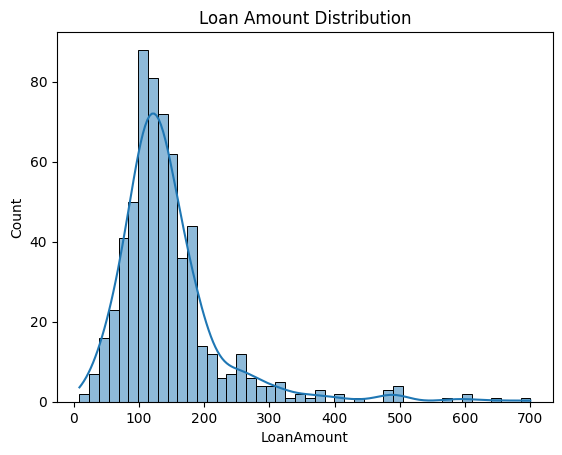

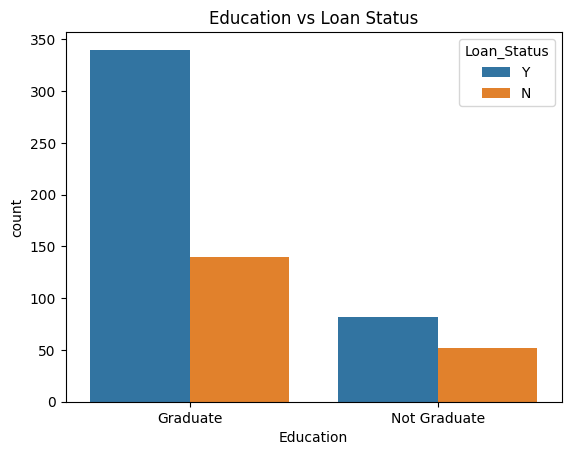

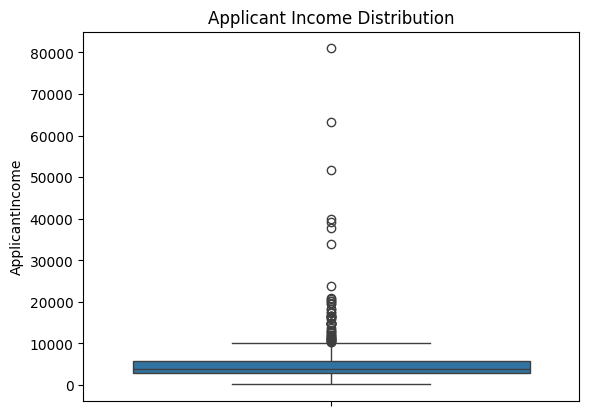

Total NaNs after cleaning: 0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.7886178861788617
Decision Tree Accuracy: 0.6747967479674797


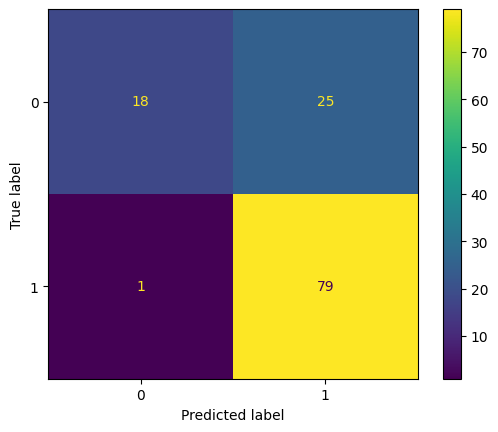

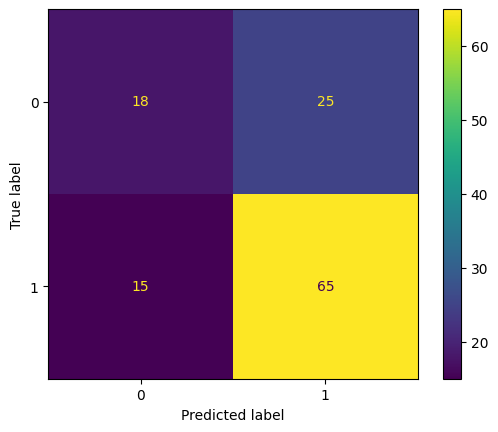

In [22]:
# 📌 Step 1 — Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 📌 Step 2 — Load the dataset
df = pd.read_csv("train.csv")  # Change filename if needed

# 📌 Step 3 — Inspect dataset
print(df.shape)
print(df.columns)
df.head()

# 📌 Step 4 — Handle missing values (future-proof & warning-free)
fill_values = {}
for col in df.columns:
    if df[col].dtype == 'object':
        fill_values[col] = df[col].mode()[0]   # Most frequent value for categorical
    else:
        fill_values[col] = df[col].mean()      # Mean for numeric
df.fillna(value=fill_values, inplace=True)

# 📌 Step 5 — Quick EDA
sns.histplot(df['LoanAmount'], kde=True)
plt.title('Loan Amount Distribution')
plt.show()

sns.countplot(data=df, x='Education', hue='Loan_Status')
plt.title('Education vs Loan Status')
plt.show()

sns.boxplot(data=df, y='ApplicantIncome')
plt.title('Applicant Income Distribution')
plt.show()

# 📌 Step 6 — Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# 📌 Step 7 — Ensure no NaNs remain
df_encoded = df_encoded.fillna(df_encoded.mean())
print("Total NaNs after cleaning:", df_encoded.isnull().sum().sum())  # should be 0

# 📌 Step 8 — Split data
X = df_encoded.drop('Loan_Status_Y', axis=1)
y = df_encoded['Loan_Status_Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Step 9 — Train Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_log)).plot()

# 📌 Step 10 — Train Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_tree)).plot()
